In [1]:
import pandas as pd
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


[nltk_data] Downloading package stopwords to /home/user1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('/home/user1/Downloads/archive/newer.csv', encoding = 'latin', header=None)

In [3]:
#Adding header to data
data = data.rename(columns={0: 'target', 1: 'id', 2: 'TimeStamp', 3: 'query', 4: 'username', 5: 'content'})
#Dropping unncessary columns
data.drop(['id','TimeStamp','query'], axis=1, inplace=True)

In [4]:
data.loc[data['target'] == '2']

,target,username,content


In [5]:
#drop all the neutral rows
data.drop(data[data['target']==2].index, inplace = True)

In [6]:
data

,target,username,content
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
399996,4,divabat,"@healingsinger thank you, i needed that"
399997,4,nick1975,@vactress http://bit.ly/cADea Maybe this is m...
399998,4,znmeb,"@Brat13 Hell, Windows 7 will be out of my pric..."
399999,4,virmani,@jigardoshi neah.. i wish! just reminiscing r...


In [7]:

print("DATA CLEANING -- \n")

# emojis defined
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)


#This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad".
def replace_emojis(t):

    emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

    emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

    words = t.split()
    reformed = []
    for w in words:
        if w in emoji_happy:
              reformed.append("happy")
        elif w in emoji_sad:
              reformed.append("sad") 
        else:
              reformed.append(w)
    t = " ".join(reformed)
    return t
#This function replaces happy smileys with "happy" and sad smileys with "sad.
def replace_smileys(t):
    
    emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

    emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

    words = t.split()
    reformed = []
    for w in words:
        if w in emoticons_happy:
              reformed.append("happy")
        elif w in emoticons_sad:
              reformed.append("sad") 
        else:
              reformed.append(w)
    t = " ".join(reformed)
    return t


#This function replaces english lanuage contractions like "shouldn't" with "should not"
def replace_contractions(t):

    cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
   "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
   "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
   "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
   "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
   "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
   "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
   "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not","u":"you"}
    words = t.split()
    reformed = []
    for w in words:
        if w in cont:
              reformed.append(cont[w])
        else:
              reformed.append(w)
    t = " ".join(reformed)
    return t  

def replace_slang(t):

    slang = {"afaik" : "as far as i know",  "$" : " dollar ","€" : " euro ", "4ao" : "for adults only",     "a.m" : "before midday",  "aamof" : "as a matter of fact",     "acct" : "account",     "adih" : "another day in hell",     "afaic" : "as far as i am concerned",     "afaict" : "as far as i can tell",     "afaik" : "as far as i know",     "afair" : "as far as i remember",     "afk" : "away from keyboard",     "app" : "application",     "approx" : "approximately",     "apps" : "applications",     "asap" : "as soon as possible",     "asl" : "age, sex, location",     "atk" : "at the keyboard",     "ave." : "avenue",     "aymm" : "are you my mother",     "ayor" : "at your own risk",      "b&b" : "bed and breakfast",     "b+b" : "bed and breakfast",     "b.c" : "before christ",     "b2b" : "business to business",     "b2c" : "business to customer",     "b4" : "before",     "b4n" : "bye for now",     "b@u" : "back at you",     "bae" : "before anyone else",     "bak" : "back at keyboard",     "bbbg" : "bye bye be good",     "bbc" : "british broadcasting corporation",     "bbias" : "be back in a second",     "bbl" : "be back later",     "bbs" : "be back soon",     "be4" : "before",     "bfn" : "bye for now",     "blvd" : "boulevard",     "bout" : "about",     "brb" : "be right back",     "bros" : "brothers",     "brt" : "be right there",     "bsaaw" : "big smile and a wink",     "btw" : "by the way",     "bwl" : "bursting with laughter",     "c/o" : "care of",     "cet" : "central european time",     "cf" : "compare",     "cia" : "central intelligence agency",     "csl" : "can not stop laughing",     "cu" : "see you",     "cul8r" : "see you later",     "cv" : "curriculum vitae",     "cwot" : "complete waste of time",     "cya" : "see you",     "cyt" : "see you tomorrow",     "dae" : "does anyone else",     "dbmib" : "do not bother me i am busy",     "diy" : "do it yourself",     "dm" : "direct message",     "dwh" : "during work hours",     "e123" : "easy as one two three",     "eet" : "eastern european time",     "eg" : "example",     "embm" : "early morning business meeting",     "encl" : "enclosed",     "encl." : "enclosed",     "etc" : "and so on",     "faq" : "frequently asked questions",     "fawc" : "for anyone who cares",     "fb" : "facebook",     "fc" : "fingers crossed",     "fig" : "figure",     "fimh" : "forever in my heart",      "ft." : "feet",     "ft" : "featuring",     "ftl" : "for the loss",     "ftw" : "for the win",     "fwiw" : "for what it is worth",     "fyi" : "for your information",     "g9" : "genius",     "gahoy" : "get a hold of yourself",     "gal" : "get a life",     "gcse" : "general certificate of secondary education",     "gfn" : "gone for now",     "gg" : "good game",     "gl" : "good luck",     "glhf" : "good luck have fun",     "gmt" : "greenwich mean time",     "gmta" : "great minds think alike",     "gn" : "good night",     "g.o.a.t" : "greatest of all time",     "goat" : "greatest of all time",     "goi" : "get over it",     "gps" : "global positioning system",     "gr8" : "great",     "gratz" : "congratulations",     "gyal" : "girl",     "h&c" : "hot and cold",     "hp" : "horsepower",     "hr" : "hour",     "hrh" : "his royal highness",     "ht" : "height",     "ibrb" : "i will be right back",     "icq" : "i seek you",     "icymi" : "in case you missed it",     "idc" : "i do not care",     "idgadf" : "i do not give a damn fuck",     "idgaf" : "i do not give a fuck",     "idk" : "i do not know",     "ie" : "that is",     "i.e" : "that is",     "ifyp" : "i feel your pain",     "IG" : "instagram",     "iirc" : "if i remember correctly",  "imho" : "in my humble opinion",     "imo" : "in my opinion",     "imu" : "i miss you",     "iow" : "in other words",     "irl" : "in real life",     "j4f" : "just for fun",     "jic" : "just in case",     "jk" : "just kidding",     "jsyk" : "just so you know",     "l8r" : "later",     "lb" : "pound",     "lbs" : "pounds",     "ldr" : "long distance relationship",     "lmao" : "laugh my ass off",     "lmfao" : "laugh my fucking ass off",     "lol" : "laughing out loud",     "ltd" : "limited",     "ltns" : "long time no see",     "m8" : "mate",     "mf" : "motherfucker",     "mfs" : "motherfuckers",     "mfw" : "my face when",     "mofo" : "motherfucker",     "mph" : "miles per hour",     "mr" : "mister",     "mrw" : "my reaction when",     "ms" : "miss",     "mte" : "my thoughts exactly",     "nagi" : "not a good idea",     "nbc" : "national broadcasting company",     "nbd" : "not big deal",     "nfs" : "not for sale",     "ngl" : "not going to lie",     "nhs" : "national health service",     "nrn" : "no reply necessary",     "nsfl" : "not safe for life",     "nsfw" : "not safe for work",     "nth" : "nice to have",     "nvr" : "never",     "nyc" : "new york city",     "oc" : "original content",     "og" : "original",     "ohp" : "overhead projector",     "oic" : "oh i see",     "omdb" : "over my dead body",     "omg" : "oh my god",     "omw" : "on my way",     "p.a" : "per annum",     "p.m" : "after midday",     "pm" : "prime minister",     "poc" : "people of color",     "pov" : "point of view",     "pp" : "pages",     "ppl" : "people",     "prw" : "parents are watching",     "ps" : "postscript",     "pt" : "point",     "ptb" : "please text back",     "pto" : "please turn over",     "qpsa" : "what happens",      "ratchet" : "rude",     "rbtl" : "read between the lines",     "rlrt" : "real life retweet",      "rofl" : "rolling on the floor laughing",     "roflol" : "rolling on the floor laughing out loud",     "rotflmao" : "rolling on the floor laughing my ass off",  "rt" : "retweet",     "ruok" : "are you ok",     "sfw" : "safe for work", "smh" : "shake my head",     "sq" : "square",     "srsly" : "seriously",      "ssdd" : "same stuff different day",     "tbh" : "to be honest",     "tbs" : "tablespooful",     "tbsp" : "tablespooful",     "tfw" : "that feeling when",     "thks" : "thank you",     "tho" : "though",     "thx" : "thank you",     "tia" : "thanks in advance",     "til" : "today i learned",     "tl;dr" : "too long i did not read",     "tldr" : "too long i did not read",     "tmb" : "tweet me back",     "tntl" : "trying not to laugh",     "ttyl" : "talk to you later",     "u" : "you",     "u2" : "you too",     "u4e" : "yours for ever",     "utc" : "coordinated universal time",     "w/" : "with",     "w/o" : "without",     "w8" : "wait",     "wassup" : "what is up",     "wb" : "welcome back",     "wtf" : "what the fuck",     "wtg" : "way to go",     "wtpa" : "where the party at",     "wuf" : "where are you from",     "wuzup" : "what is up",     "wywh" : "wish you were here",     "yd" : "yard",     "ygtr" : "you got that right",     "ynk" : "you never know",     "zzz" : "sleeping bored and tired",  "afk" : "away from keyboard", "asap" : "as soon as possible", "atk" : "at the keyboard", "atm" : "at the moment", "a3" : "anytime, anywhere, anyplace", "bak" : "back at keyboard", "bbl" : "be back later", "bbs" : "be back soon", "bfn" : "bye for now", "brb" : "be right back", "brt" : "be right there", "btw" : "by the way", "b4" : "before", "b4n" : "bye for now", "cu" : "see you", "cul8r" : "see you later", "cya" : "see you", "faq" : "frequently asked questions", "fc" : "fingers crossed", "fwiw" : "for what it's worth", "fyi" : "for your information", "gal" : "get a life", "gg" : "good game", "gn" : "good night", "gmta" : "great minds think alike", "gr8" : "great!", "g9" : "genius", "ic" : "i see", "icq" : "i seek you (also a chat program)","ilu": "i love you", "imho" : "in my honest/humble opinion", "imo" : "in my opinion", "iow" : "in other words", "irl" : "in real life", "kiss" : "keep it simple, stupid", "ldr" : "long distance relationship", "lmao" : "laugh my a.. off", "lol" : "laughing out loud", "ltns" : "long time no see", "luv" : "love", "l8r" : "later", "mte" : "my thoughts exactly", "m8" : "mate", "nrn" : "no reply necessary", "oic" : "oh i see", "pita" : "pain in the a..", "prt" : "party", "prw" : "parents are watching","rofl" : "rolling on the floor laughing", "roflol" : "rolling on the floor laughing out loud", "rotflmao" : "rolling on the floor laughing my a.. off", "sk8" : "skate", "stats" : "your sex and age", "asl" : "age, sex, location", "thx" : "thank you", "ttfn" : "ta-ta for now!", "ttyl" : "talk to you later", "u" : "you", "u2" : "you too", "u4e" : "yours for ever", "wb" : "welcome back", "wtf" : "what the f...", "wtg" : "way to go!", "wuf" : "where are you from?", "w8" : "wait", "rn":"right now","ya":"yes","yeah":"yes","ur":"you are","ok":"okay"}
                
    words = t.split()
    reformed = []
    for w in words:
        if w in slang:
              reformed.append(slang[w])
        else:
              reformed.append(w)
    t = " ".join(reformed)
    return t  


#This function removes words that are single characters
def remove_single_letter_words(t):
    words = t.split()
    reformed = []
    for w in words:
        if len(w) > 1:
            reformed.append(w)
    t = " ".join(reformed)
    return t  

def dataclean(t):

    t = replace_smileys(t) # replace handwritten emojis with their feeling associated
    t = t.lower() # convert to lowercase
    t = replace_contractions(t) # replace short forms used in english  with their actual words
    t = replace_slang(t)
    t = replace_emojis(t) # replace unicode emojis with their feeling associated
    t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
    t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
    t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
    t = re.sub('#', '', t) # remove '#'
    t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
    t = re.sub('@[^\s]+', '', t) # remove usernames
    t = re.sub('RT[\s]+', '', t) # remove retweet 'RT'
    t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
    t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
    t = t.replace('\\\\', '')
    t = t.replace('\\', '')
    t = remove_single_letter_words(t) # removes single letter words
  
    return t

data['content'] = data['content'].apply(dataclean)
print("Tweets have been cleaned.")

DATA CLEANING -- 

Tweets have been cleaned.


In [8]:
#NLTK
english_stopwords = stopwords.words('english')
#base of english stopwords
stemmer = SnowballStemmer('english')
#stemming algorithm
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
#regex for mentions and links in tweets

def preprocess(content, stem=False):
    content = re.sub(regex, ' ', str(content).lower()).strip()
    tokens = []
    for token in content.split():
        if token not in english_stopwords:
              tokens.append(stemmer.stem(token))
    return " ".join(tokens)

data.content = data.content.apply(lambda x: preprocess(x))

In [9]:
data.head()

,target,username,content
0,0,_TheSpecialOne_,awww bummer shoulda got david carr third day
1,0,scotthamilton,upset cannot updat facebook text might cri res...
2,0,mattycus,dive mani time ball manag save rest go bound
3,0,ElleCTF,whole bodi feel itchi like fire
4,0,Karoli,behav mad cannot see


In [10]:
data.describe()

,target
count,400001.000000
mean,1.999995
std,2.000002
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,4.000000


In [11]:
#Start training the model

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tweets_countvectorizer = vectorizer.fit_transform(data['content'])


In [12]:
X=tweets_countvectorizer
y=data['target']

In [13]:
tweets_countvectorizer.shape

(400001, 137032)

In [14]:
X.shape
y.shape

(400001,)

<AxesSubplot:>

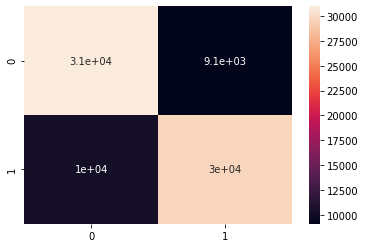

In [18]:
from sklearn.model_selection import train_test_split

import seaborn as sns

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_predict_test=NB_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True)


In [19]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     40068
           4       0.77      0.74      0.75     39933

    accuracy                           0.76     80001
   macro avg       0.76      0.76      0.76     80001
weighted avg       0.76      0.76      0.76     80001



In [24]:
acc=accuracy_score(y_test,y_predict_test)

In [33]:
print("{:.4f}".format(round(acc, 4)))

0.7585
